# Метод опорных векторов - Support Vector Machines 
## Упражнения

## Подделка вина

Чаще всего вино подделывают, разбавляя его более дешёвыми продуктами (например, соком), а иногда и с помощью опасных химикатов или подсластителей (чтобы добавить цвет или вкус).

Другой тип подделки - продажа более дешёвых вин под более дорогими марками.

<img src="wine.jpg">

## Цели проекта

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


Источник данных: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**ЗАДАНИЕ: Обшая цель - используя данные ниже, разработайте модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным. Выполните задания ниже.**

---
---

## Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: запустите ячейки ниже, чтобы импортировать библиотеки и загрузить данные.**

In [645]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [646]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [647]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


**ЗАДАНИЕ: Сколько различных значений находится в целевой колонке quality, значения которой мы будем предсказывать?**

In [648]:
df['quality'].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

In [649]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**ЗАДАНИЕ: Нарисуйте график countplot, отображающий количество для каждой из категорий - Legit и Fraud.**

<Axes: xlabel='quality', ylabel='count'>

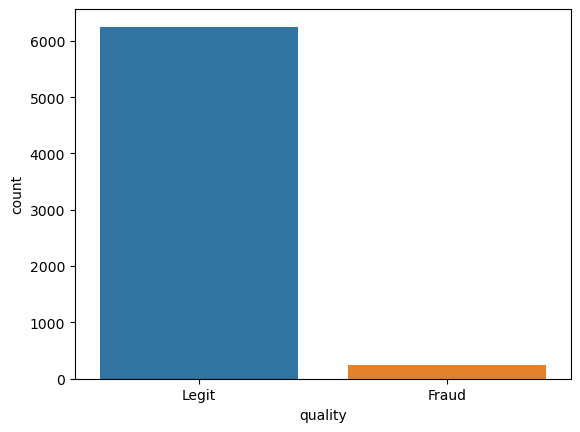

In [650]:
sns.countplot(data=df, x='quality')

**ЗАДАНИЕ: Давайте выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое. Нарисуйте график countplot, отображая *тип* вина по оси x, и разбивая значения Fraud и Legit с помощью параметра hue.**

In [651]:
df.groupby('type')['type'].value_counts()

type
red      1599
white    4898
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

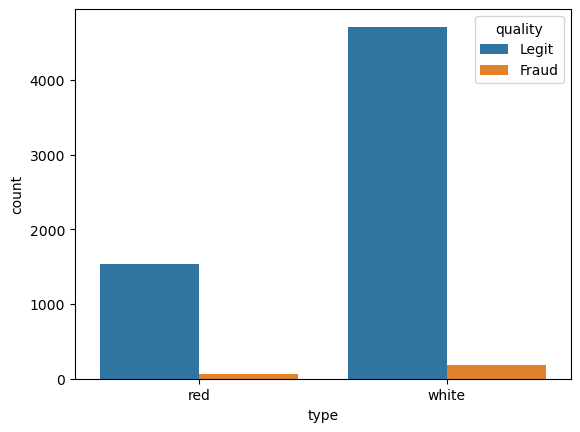

In [652]:
sns.countplot(data=df, x='type', hue='quality')

**ЗАДАНИЕ: Какой процент красных вин является подделкой? Какой процент белых вин является подделкой?**

In [653]:
df.groupby(['type', 'quality'])[['type', 'quality']].value_counts().reset_index()

,type,quality,count
0,red,Fraud,63
1,red,Legit,1536
2,white,Fraud,183
3,white,Legit,4715


In [654]:
reds = df[df["type"]=='red']

In [655]:
whites = df[df["type"]=='white']

In [656]:
print("Percentage of fraud in Red Wines:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [657]:
print("Percentage of fraud in White Wines:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in White Wines:
3.7362188648427925


In [658]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


**ЗАДАНИЕ: Вычислите корреляцию между различными признаками и колонкой "quality". Чтобы сделать это, Вам можете использовать значения 0 и 1 вместо текстовых значений Legit и Fraud.**

In [659]:
#df['quality']= pd.get_dummies(df['quality'],drop_first=True)
#df['type'] = pd.get_dummies(df['type'],drop_first=True)

df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})


In [660]:
feature_corr = df.corr(numeric_only=True)['Fraud'].sort_values().reset_index()
feature_corr

,index,Fraud
0,free sulfur dioxide,-0.085204
1,citric acid,-0.061789
2,alcohol,-0.051141
3,residual sugar,-0.048756
4,total sulfur dioxide,-0.035252
5,sulphates,-0.034046
6,density,0.016351
7,pH,0.020107
8,fixed acidity,0.021794
9,chlorides,0.034499


<Axes: >

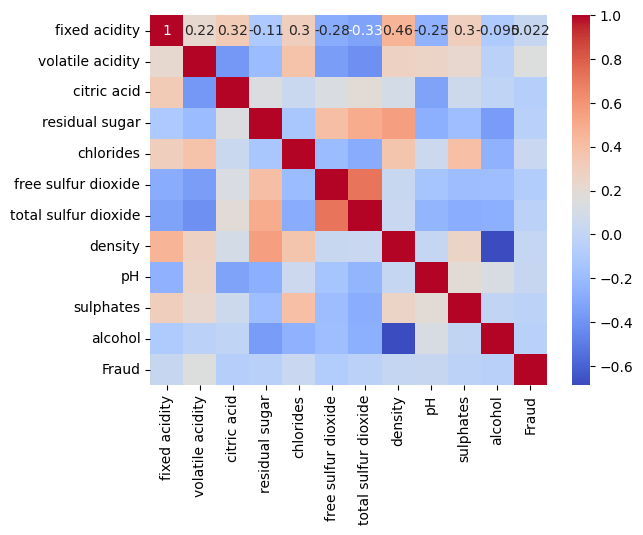

In [661]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

**ЗАДАНИЕ: Нарисуйте график bar plot, отобразив значения корреляции для поддельных вин.**

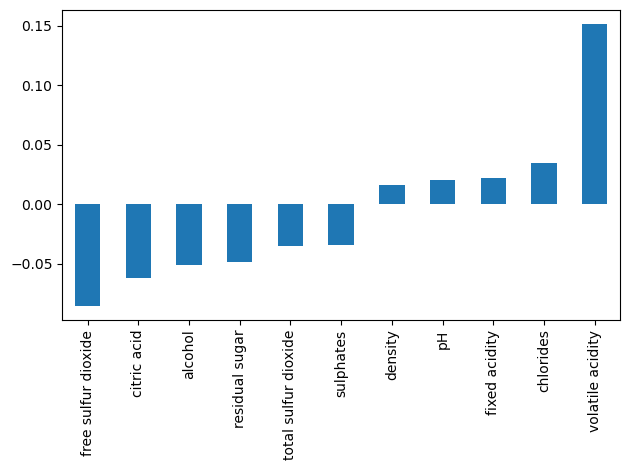

In [662]:
# Напишите Ваш код здесь

df.corr(numeric_only=True)['Fraud'][:-1].sort_values().plot(kind='bar')
plt.tight_layout()

**ЗАДАНИЕ: Нарисуйте график clustermap с помощью seaborn, чтобы исследовать связи между переменными.**

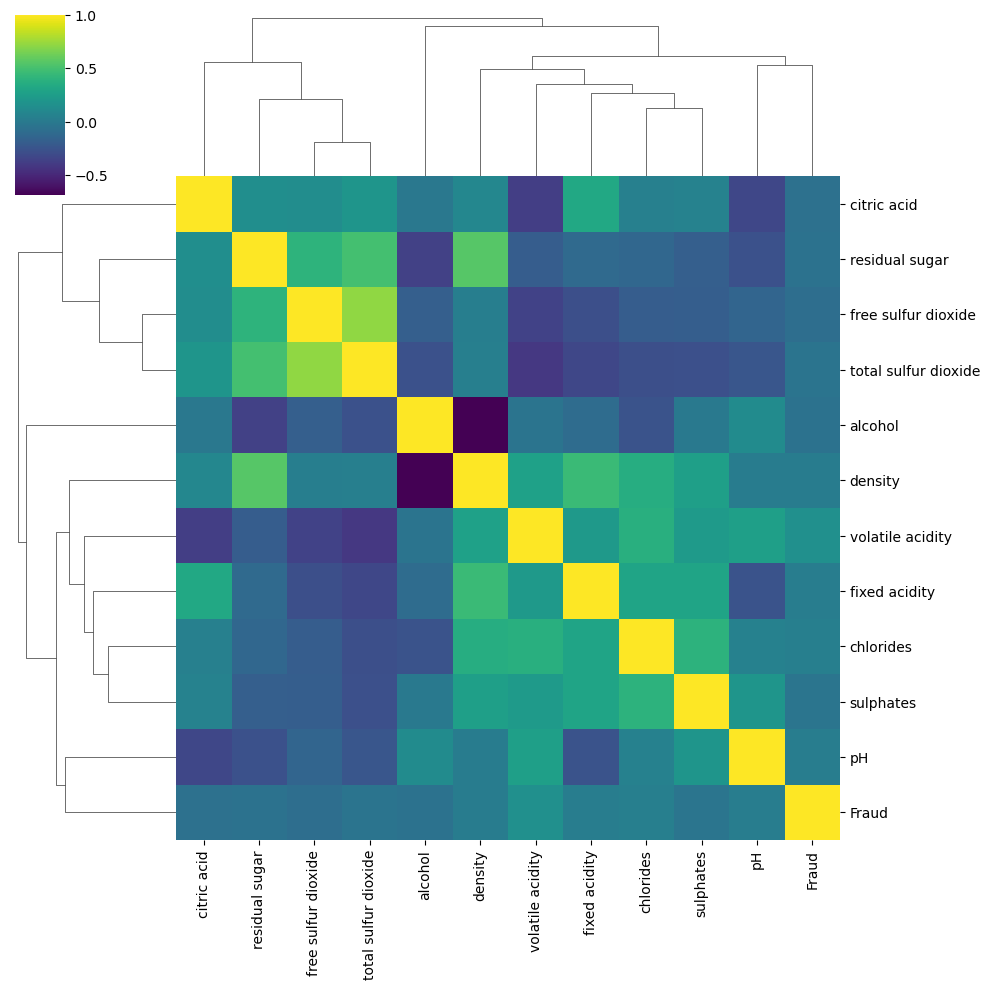

In [663]:
sns.clustermap(df.corr(numeric_only=True),cmap='viridis')

----
## Модель машинного обучения



**ЗАДАНИЕ: Разделите данные на признаки X и целевую переменную y (колонка "quality")**

In [664]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df = df.drop('Fraud',axis=1)
X = df.drop('quality', axis=1)
y = df['quality']

**ЗАДАНИЕ: Разбейте данные на обучающий и тестовый набор данных, в отношении 90% и 10%. Замечание - в решении мы используем random state = 101**

In [665]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [666]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ЗАДАНИЕ: Смасштабируйте данные в наборах X train и X test.**

In [667]:
from sklearn.preprocessing import StandardScaler

In [668]:
scaler = StandardScaler()

In [669]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**ЗАДАНИЕ: Создайте экземпляр классификатора Support Vector Machine. Раньше мы оставляли эту модель "пустой" (то есть, без параметров). Однако, поскольку мы знаем, что классы несбалансированы, для решения этой проблемы мы можем автоматически подобрать веса обратно пропорционально тому, как часто встречаются классы во входных переменных, используя параметр в вызове метода SVC(). Выясните в онлайн-документации по SVC, что это за параметр.**

In [670]:
# Напишите Ваш код здесь
from sklearn.svm import SVC

In [671]:
svc = SVC(class_weight='balanced')

**ЗАДАНИЕ: С помощью GridSearchCV выполните поиск по сетке значений параметров C и gamma.**

In [672]:
# Напишите Ваш код здесь
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale'], 'kernel':['rbf','poly'], 'degree':[2,3,4]}
grid = GridSearchCV(svc,param_grid, cv=15, refit=True, n_jobs=-1, verbose=1)

In [673]:
grid.fit(X_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


GridSearchCV(cv=15, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'gamma': ['scale'], 'kernel': ['rbf', 'poly']},
             verbose=1)

In [674]:
grid.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

**ЗАДАНИЕ: Отобразите матрицу "confusion matrix" и отчёт "classification report" для Вашей модели.**

In [675]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [676]:
y_pred = grid.predict(X_test)

In [677]:
confusion_matrix(y_test, y_pred)

array([[   7,   71],
       [  16, 1856]])

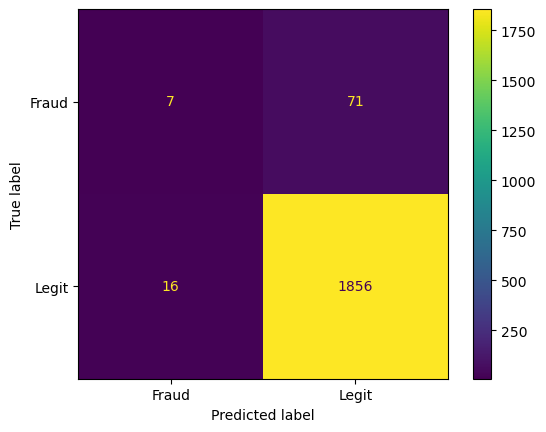

In [678]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [679]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.30      0.09      0.14        78
       Legit       0.96      0.99      0.98      1872

    accuracy                           0.96      1950
   macro avg       0.63      0.54      0.56      1950
weighted avg       0.94      0.96      0.94      1950



**ЗАДАНИЕ: Как Вы думаете, насколько хорошо работает модель? Можно ли рекомендовать её к применению? Будет ли она работать в реальной жизни?**

Резульаты хим анализов, могут быть недостаточными для определения подделки, возможно, нужно добавить другие признаки, например, свойства этикеток, добавить историю покупок. Сейчас не хватат данных, для построения точной модели